# Activity 2-8
This notebook details Activites from 2 to 8.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# We will explain what's going on here on the next chapter. 
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

## Activity 2 - Reading data
We will use the the RadNet Laboratory Analysis, from the U.S. Environmental Protection Agency, located [here](https://opendata.socrata.com/api/views/cf4r-dfwe/). This dataset describes the radioactive content collected by the USPA in different cities in the US, for different radionuclides. 


In [0]:
url = "https://opendata.socrata.com/api/views/cf4r-dfwe/rows.csv?accessType=DOWNLOAD"

In [0]:
df = pd.read_csv(url)

In [41]:
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect


## Data manipulation with Pandas

We will perform show how to perform common analysis tasks using Pandas dataframes. The operations that we will work on are:
1. Selection and slicing
2. Filtering
3. Applying a function to a column
4. Transform data types
5. Aggregation and group by

These are a common operations on any analysis and will help understanding the dataframe abstraction.

### Activity 3 - Selection and filtering

To select a subset of data in a dataframe, we use the same Python approach of slicing:

In [42]:
df[0:10]

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect
5,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.016,NaN,0.023,0.2,0.019,Non-detect,NaN,NaN,0.027
6,AK,Nome,04/04/2011,03/24/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.14,Non-detect,0.12,0.43,0.094,Non-detect,Non-detect,Non-detect,0.14
7,AK,Nome,04/04/2011,03/24/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.1,0.012,0.13,0.39,0.076,Non-detect,0.12,0.061,0.12
8,HI,Oahu,03/30/2011,03/20/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.034,NaN,0.021,0.2,Non-detect,Non-detect,NaN,NaN,Non-detect
9,HI,Oahu,03/30/2011,03/20/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.028,NaN,0.036,0.14,0.02,Non-detect,NaN,NaN,0.029


### Activity 4 - Column selection and filter
To select a column, use the name of the column:

In [43]:
df['State'].head()

0    ID
1    ID
2    AK
3    AK
4    AK
Name: State, dtype: object

To filter based on the value of the data, use the comparison:

In [44]:
df[df.State == 'MN'].head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
367,MN,St. Paul,04/08/2011,03/28/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
368,MN,St. Paul,04/22/2011,04/13/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,0.16,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
380,MN,Welch,04/08/2011,03/29/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
381,MN,Welch,06/01/2011,04/14/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
555,MN,St. Paul,04/04/2011,03/22/2011,Precipitation,pCi/l,Non-detect,Non-detect,Non-detect,NaN,Non-detect,32.3,Non-detect,Non-detect,NaN,NaN,Non-detect


More than one condition can be applied at the same time:

In [45]:
df[(df.State == 'CA') & (df['Sample Type'] == 'Drinking Water')]

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
305,CA,Los Angeles,04/10/2011,04/04/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,0.39,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
306,CA,Los Angeles,06/01/2011,04/12/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,0.18,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
356,CA,Richmond,04/09/2011,03/29/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect
357,CA,Richmond,06/01/2011,04/13/2011,Drinking Water,pCi/l,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect,Non-detect


Another common approach is the use of the method `.loc`:

```
df.loc[<row selection>, <column selection>]
```

To select a subset of the dataframe based on a 

In [46]:
df.loc[df.State == 'AK', 'Sample Type'].head()

2    Air Filter
3    Air Filter
4    Air Filter
5    Air Filter
6    Air Filter
Name: Sample Type, dtype: object

Note that, differently from the results above, the result of the loc filter is a Series and not a DataFrame. This depends on the operation and selection done on the DataFrame and not is caused only by loc: as the DataFrame can be understood as a 2D combination of Series, a selection of one column will return a Series.

In [47]:
type(df['Cs-134'])

pandas.core.series.Series

To do a selection and still return a dataframe, use double brackets:

In [48]:
df[['I-132']].head()

,I-132
0,Non-detect
1,Non-detect
2,Non-detect
3,Non-detect
4,Non-detect


More than one column can be selected at the same time:

In [49]:
df[['State', 'Te-129', 'Cs-134']].head()

,State,Te-129,Cs-134
0,ID,NaN,Non-detect
1,ID,NaN,Non-detect
2,AK,NaN,0.0057
3,AK,NaN,Non-detect
4,AK,NaN,Non-detect


### Activity 5 - Applying a function to a column

To transform a column with a function we can use the `apply` method. Let's transform the values from text to a valid numpy value:

In [88]:
columns = df.columns
id_cols = ['State', 'Location', "Date Posted", 'Date Collected', 'Sample Type', 'Unit']
columns = list(set(columns) - set(id_cols))
columns

['I-132',
 'Te-129m',
 'I-133',
 'Te-129',
 'Cs-134',
 'Cs-136',
 'Co-60',
 'Ba-140',
 'I-131',
 'Te-132',
 'Cs-137']

In [0]:
df['Cs-134'] = df['Cs-134'].apply(lambda x: np.nan if x == "Non-detect" else x)

In [57]:
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,NaN,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,NaN,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,NaN,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,NaN,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect


The function that we want to apply can be any Python function that would manipulate each row. We can also apply a function to several columns using the `applymap` function:

In [0]:
df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'Non-detect' else x)
df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'ND' else x)

In [59]:
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN,NaN
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,NaN,NaN,0.0057,NaN,0.0074,0.067,NaN,NaN,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN,NaN,NaN


In [0]:
df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']] = df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']].applymap(lambda x: x.strip())

### Activity 6 - Data types

Let's manipulate the data types.

In [61]:
df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [0]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])

In [0]:
for col in columns:
    df[col] = pd.to_numeric(df[col])

In [64]:
df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [0]:
df['State'] = df['State'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Unit'] = df['Unit'].astype('category')
df['Sample Type'] = df['Sample Type'].astype('category')

In [66]:
df.dtypes

State                   category
Location                category
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type             category
Unit                    category
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

### Activity 7- Aggregation and Grouping

In [67]:
df.groupby('State')['Cs-134'].mean().head()

State
AK    0.046191
AL    5.600000
AR         NaN
AZ         NaN
CA    1.791289
Name: Cs-134, dtype: float64

In [68]:
df.groupby('State').mean().head()

,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
State,,,,,,,,,,,
AK,NaN,NaN,0.046191,0.012,0.048533,0.310825,0.096625,NaN,0.12,0.061,0.104636
AL,NaN,NaN,5.600000,NaN,0.001800,2.333000,NaN,NaN,NaN,NaN,0.009400
AR,NaN,NaN,NaN,NaN,NaN,19.766667,NaN,NaN,NaN,NaN,NaN
AZ,NaN,NaN,NaN,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,NaN
CA,NaN,NaN,1.791289,NaN,1.380839,9.700774,0.015275,0.002,NaN,NaN,0.934762


In [69]:
df.groupby(['State', 'Location']).agg({'Cs-134':['mean', 'std'], 'Te-129':['min', 'max']})

Cs-134           Te-129      
                            mean       std    min   max
State Location                                         
AK    Dutch Harbor      0.040467  0.026750    NaN   NaN
      Fairbanks              NaN       NaN    NaN   NaN
      Juneau            0.004650  0.001485    NaN   NaN
      Nome              0.085333  0.063288   0.12  0.12
AL    Dothan                 NaN       NaN    NaN   NaN
      Montgomery             NaN       NaN    NaN   NaN
      Montgomery/408         NaN       NaN    NaN   NaN
      Muscle Shoals          NaN       NaN    NaN   NaN
      Scottsboro        5.600000       NaN    NaN   NaN
AR    Little Rock            NaN       NaN    NaN   NaN
AZ    Phoenix                NaN       NaN    NaN   NaN
CA    Anaheim           0.012950  0.010853    NaN   NaN
      Los Angeles            NaN       NaN    NaN   NaN
      Oakland           2.500000       NaN    NaN   NaN
      Richmond          6.900000  1.868154    NaN   NaN
      Riverside         0.000240       NaN    NaN   NaN
      San Bernardino    0.011267  0.002194    NaN   NaN
      San Francisco     0.000920       NaN    NaN   NaN
CNMI  Saipan            0.035600  0.031181    NaN   NaN
CO    Denver                 NaN       NaN    NaN   NaN
CT    Hartford               NaN       NaN    NaN   NaN
DE    Dover                  NaN       NaN    NaN   NaN
      Wilmington             NaN       NaN    NaN   NaN
FL    Jacksonville      0.703650  0.984788    NaN   NaN
      Miami                  NaN       NaN    NaN   NaN
      Orlando           0.015000       NaN    NaN   NaN
      Plant City             NaN       NaN    NaN   NaN
      Tampa                  NaN       NaN    NaN   NaN
GA    Atlanta                NaN       NaN    NaN   NaN
      Baxley                 NaN       NaN    NaN   NaN
...                          ...       ...    ...   ...
TN    Chattanooga            NaN       NaN    NaN   NaN
      Knoxville              NaN       NaN    NaN   NaN
      Memphis                NaN       NaN    NaN   NaN
      Nashville              NaN       NaN    NaN   NaN
      Oak Ridge/360          NaN       NaN    NaN   NaN
      Oak Ridge/371          NaN       NaN    NaN   NaN
      Oak Ridge/4442         NaN       NaN    NaN   NaN
      Oak Ridge/768          NaN       NaN    NaN   NaN
      Oak Ridge/772          NaN       NaN    NaN   NaN
      Oak Ridge/K-12         NaN       NaN    NaN   NaN
      Oak Ridge/K-25         NaN       NaN    NaN   NaN
      Oak Ridge/K25          NaN       NaN    NaN   NaN
      Oak Ridge/Melton  1.300000       NaN    NaN   NaN
      Oak Ridge/Y-12    1.300000       NaN    NaN   NaN
      Oak Ridge/Y-12E        NaN       NaN    NaN   NaN
      Oak Ridge/Y12E         NaN       NaN    NaN   NaN
TX    Austin                 NaN       NaN    NaN   NaN
      Dallas                 NaN       NaN    NaN   NaN
      San Antonio            NaN       NaN    NaN   NaN
UT    Salt Lake City    0.707000  0.980050    NaN   NaN
VA    Ashland                NaN       NaN    NaN   NaN
      Lynchburg              NaN       NaN    NaN   NaN
VT    Montpelier             NaN       NaN    NaN   NaN
WA    Olympia                NaN       NaN    NaN   NaN
      Richland               NaN       NaN    NaN   NaN
      Seattle           0.000520       NaN    NaN   NaN
      Spokane                NaN       NaN    NaN   NaN
      Tacoma                 NaN       NaN    NaN   NaN
WI    Madison                NaN       NaN    NaN   NaN
WV    Charleston             NaN       NaN    NaN   NaN

[130 rows x 4 columns]

### Activity 8 -Exporting dataframes

In [0]:
df.to_csv('radiation_clean.csv', index=False, sep=';', encoding='utf-8')

In [0]:
# Careful with type conversion: datetime to string!
df.to_parquet('radiation_clean.prq', index=False)

### Activity 9 - Plotting

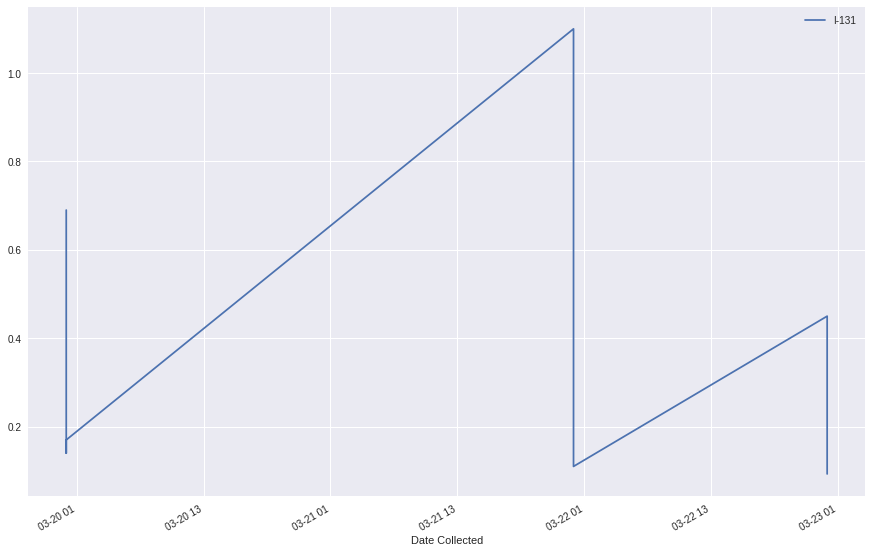

In [77]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131')

In [78]:
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN
1,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN,NaN
2,AK,Juneau,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,0.0057,NaN,0.0074,0.067,NaN,NaN,NaN,NaN,0.0043
3,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN
4,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN


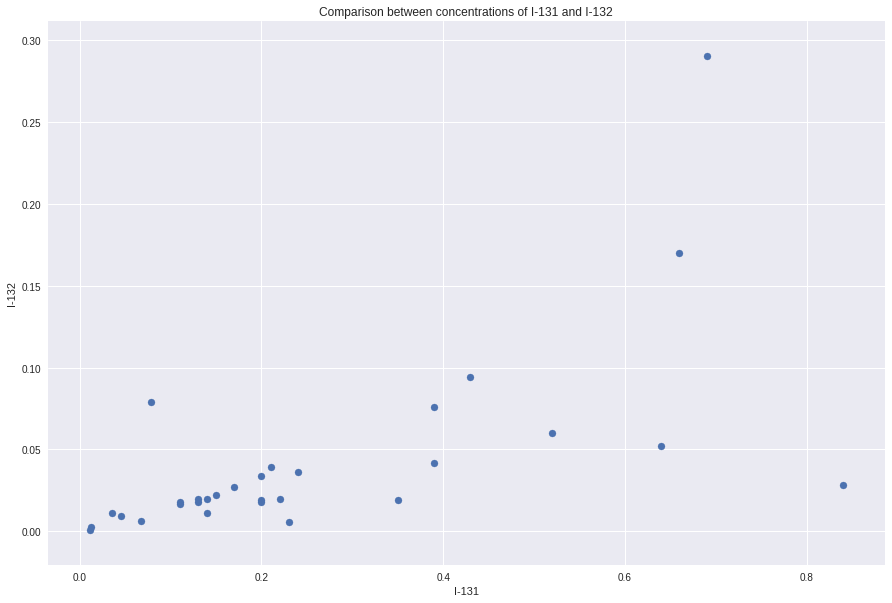

In [82]:
fig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
    xlabel='I-131',
    ylabel='I-132',
    title='Comparison between concentrations of I-131 and I-132'
)

## EXTRA - Tidy data

To better plot the data, we will transform the dataset into a Tidy dataset. To accomplish that, we will use the `melt` operation. 

In [0]:
df_m = pd.melt(df, id_vars=id_cols, value_vars=columns, value_name='concentration')

In [100]:
df_m.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,variable,concentration
0,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,I-132,NaN
1,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,I-132,NaN
2,AK,Juneau,2011-03-30,2011-03-23,Air Filter,pCi/m3,I-132,NaN
3,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,I-132,NaN
4,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,I-132,NaN


In [103]:
df_m.groupby('Unit').mean()

,concentration
Unit,
pCi/l,21.930000
pCi/m3,0.173123


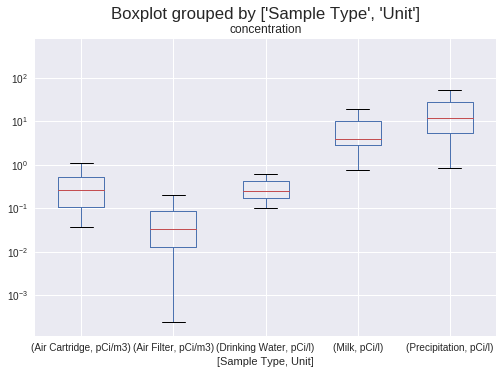

In [136]:
fig, ax = plt.subplots()
ax.set_yscale('log')
df_m.boxplot(by=['Sample Type', 'Unit'], column=['concentration'], ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


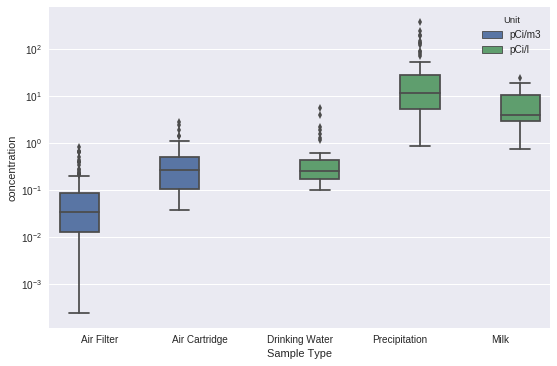

In [143]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.boxplot(x='Sample Type', y='concentration', hue='Unit', data=df_m)